In [1]:
#--------------------------------
## IMPORTS
#--------------------------------
import sys
import os

# set the path to find the modules
sys.path.insert(0, '../../005_src/') #use relative path
os.chdir("../../005_src")

from config import *


----------------------------------------
Packages import successful
Variables import successful
Helper Functions import successful
Functions import successful
Functions xml import successful
Functions graph import successful
Functions GCN import successful
Functions Plotting import successful
Functions Data Adjustments import successful
----------------------------------------
root directory: /storage/remote/atcremers50/ss21_multiagentcontrol/
input directory: /storage/remote/atcremers50/ss21_multiagentcontrol/004_data/
output directory: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/
----------------------------------------

----------------------------------------
root directory: /storage/remote/atcremers50/ss21_multiagentcontrol/
input directory: /storage/remote/atcremers50/ss21_multiagentcontrol/004_data/
output directory: /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/
----------------------------------------



In [2]:
device = cudaOverview()

CUDA available
Number of Devices: 1
ID current Device NVIDIA GeForce GTX 1050 Ti: 0
	current GPU memory usage by tensors in bytes:0
	current GPU memory managed by caching allocator in bytes:0


In [3]:
this_date = "20210725"
ts = "00h41m56s"#"22h28m11s"#"21h30m51s"#"18h37m00s"#"20h33m28s"#"19h37m02s" #"13h15m59s"
GCN_num = "014"
this_GCN = f"GCN_{GCN_num}"
print (this_GCN)

from _03_Networks.GCN_014.GCN_model_014 import *
from _03_Networks.GCN_014.GCN_trainer_014 import *
this_GCN, ts_import = check_import()

GCN_014
at 13h53m49s imported models:
['GCN_HL01_bn_relu', 'GCN_HL01_bn_tanh', 'GCN_HL02_bn_relu', 'GCN_HL02_bn_tanh', 'GCN_HL03_bn_relu', 'GCN_HL03_bn_tanh']
imported trainer: GCN_014 at 13h53m49s


## Reload dictionary

In [4]:
MODEL_OUTPUT_PATH = os.path.join(OUTPUT_DIR,f"{this_GCN}/")
MODEL_OUTPUT_PATH_TODAY = os.path.join(MODEL_OUTPUT_PATH,f"{this_date}-{ts}/")
print (MODEL_OUTPUT_PATH_TODAY)

/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_014/20210725-00h41m56s/


In [5]:
dict_text_output_path = f"/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/{this_GCN}/{this_date}-{ts}/{this_date}-{ts}_training_parameters"

reloaded_dict = pkl.load(open(f'{dict_text_output_path}.pkl',"rb"))
reloaded_dict

{'input_file_name': '20210711-17h59m44s_timesteps30000_ec3500_em7000',
 'max_num_veh': 10,
 'sim_duration_timesteps': '30000',
 'train_size': 0.9,
 'batch_size': 512,
 'Nepochs': 5000,
 'run_date': '20210725-',
 'run_time': '00h41m56s',
 'model': 'GCN_014',
 'combo': ('mean',
  512,
  'Adam',
  'L1',
  [128, 256, 64],
  0.001,
  0.6,
  0,
  'CosineAnnealingWarmRestarts',
  False,
  'relu'),
 'random_seed': 42,
 'save_every': 250,
 'transformstat': False,
 'plotstat': True,
 'printstat': False,
 'intentionstat': 'obsoleted',
 'use_edges_attr': False,
 'activation_function': 'relu',
 'shuttle_train_frame': 29845,
 'shuttle_val_frame': 25744,
 'num_rows_training': 22478,
 'num_rows_validation': 2248,
 'num_rows_test': 250,
 'exclude_yaw': 'obsoleted',
 'concatenatestat': 'obsoleted',
 'paddingstat': 'obsoleted',
 'size_input': 6,
 'size_output': 3,
 'model_architecture': GCN_HL03_bn_relu(
   (conv1): GraphConv(6, 128)
   (conv2): GraphConv(128, 256)
   (conv3): GraphConv(256, 64)
   (conv

In [6]:
input_file_name = reloaded_dict["input_file_name"]
reloaded_dict["model_architecture"]

GCN_HL03_bn_relu(
  (conv1): GraphConv(6, 128)
  (conv2): GraphConv(128, 256)
  (conv3): GraphConv(256, 64)
  (conv4): GraphConv(64, 3)
  (bn1): GraphNorm(128)
  (bn2): GraphNorm(256)
  (bn3): GraphNorm(64)
)

## Plot losses

In [7]:
# load losses
t_losses_load = pkl.load(open( reloaded_dict['train_losses_path'], 'rb'))
v_losses_load = pkl.load(open( reloaded_dict['val_losses_path'], 'rb'))
lr_load = pkl.load(open( reloaded_dict['lr_path'], 'rb'))

In [8]:
#list(range(0,len(lr_load),1)),
#lr_load

Plot saved in /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_014/20210725-00h41m56s/20210725-00h41m56s_train_val_loss_plot.png


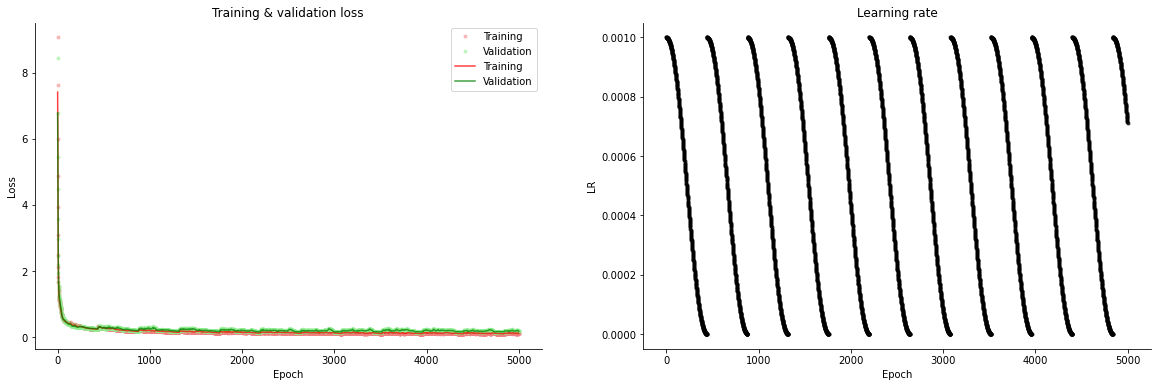

In [9]:
##================================
# TRAIN AND VAL LOSSES
##================================
START = 0
fig = plot_training(t_losses_load[START:],
                  v_losses_load[START:],
                  learning_rate = lr_load[START:],
                  gaussian=True,
                  sigma=2,
                  figsize=(20, 6),
                  mytitle = 'Training & validation loss'
                  )

description = f"{this_date}-{ts}"
new_png = f"{description}_train_val_loss_plot.png"
new_png_path = os.path.join(MODEL_OUTPUT_PATH_TODAY,new_png)
plt.savefig(new_png_path)
print (f"Plot saved in {new_png_path}")

Plot saved in /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_014/20210725-00h41m56s/20210725-00h41m56s_train_val_loss_plot.png


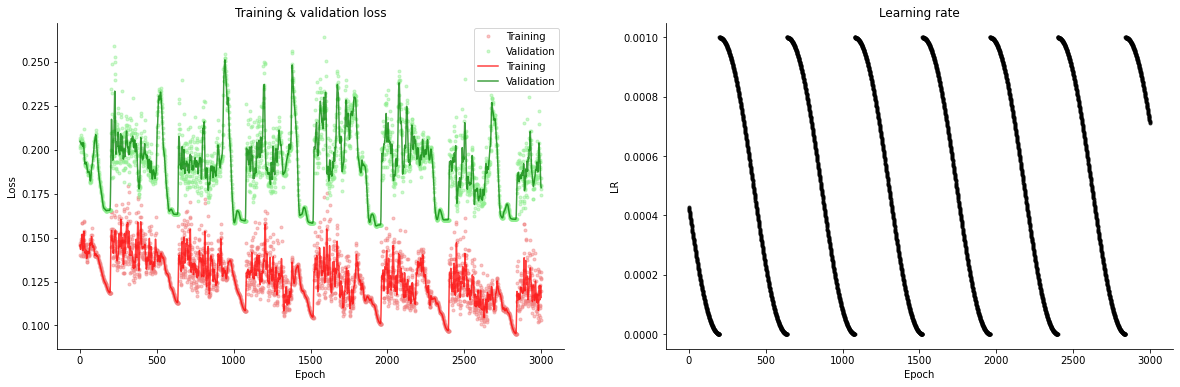

In [10]:
##================================
# TRAIN AND VAL LOSSES
##================================
START = -3000
fig = plot_training(t_losses_load[START:],
                  v_losses_load[START:],
                  learning_rate = lr_load[START:],
                  gaussian=True,
                  sigma=2,
                  figsize=(20, 6),
                  mytitle = 'Training & validation loss'
                  )

description = f"{this_date}-{ts}"
new_png = f"{description}_train_val_loss_plot.png"
new_png_path = os.path.join(MODEL_OUTPUT_PATH_TODAY,new_png)
plt.savefig(new_png_path)
print (f"Plot saved in {new_png_path}")

## Verification
of results

In [11]:
hidden_layers_sizes = reloaded_dict["hidden_layers_sizes"]
size_input = reloaded_dict['size_input']
size_output = reloaded_dict['size_output']
random_seed = reloaded_dict["random_seed"]
activation_fun = reloaded_dict["activation_function"]

In [12]:
##================================
## MODEL INIT
##================================
num_hidden_layers = len(hidden_layers_sizes)
    
#print (printstat)
#pdb.set_trace()

## TANH

if activation_fun == "tanh":
    if num_hidden_layers == 1:

        hc_1 = hidden_layers_sizes[0]
        hc_2 = None
        hc_3 = None

        model = GCN_HL01_bn_tanh(
                            num_input_features=size_input,
                            num_output_features =size_output,
                            random_seed = random_seed,
                            hc_1 = hc_1,
                            printstat = printstat, 
                            )
    elif num_hidden_layers == 2:

        hc_1 = hidden_layers_sizes[0]
        hc_2 = hidden_layers_sizes[1]
        hc_3 = None

        model = GCN_HL02_bn_tanh(
                            num_input_features=size_input,
                            num_output_features =size_output,
                            random_seed = random_seed,
                            hc_1 = hc_1,
                            hc_2 = hc_2,
                            printstat = printstat,   
                            )
    elif num_hidden_layers == 3:

        hc_1 = hidden_layers_sizes[0]
        hc_2 = hidden_layers_sizes[1]
        hc_3 = hidden_layers_sizes[2]

        model = GCN_HL03_bn_tanh(
                            num_input_features=size_input,
                            num_output_features =size_output,
                            random_seed = random_seed,
                            hc_1 = hc_1,
                            hc_2 = hc_2,
                            hc_3 = hc_3,
                            printstat = printstat,                
                            )
    else:
        print (f"ERROR: model with {num_hidden_layers=} not implemented")
        print (f"using first three layers")

        hc_1 = hidden_layers_sizes[0]
        hc_2 = hidden_layers_sizes[1]
        hc_3 = hidden_layers_sizes[2]

        model = GCN_HL03_bn_tanh(num_input_features=size_input,
                    num_output_features =size_output,
                    random_seed = random_seed,
                    hc_1 = hc_1,
                    hc_2 = hc_2,
                    hc_3 = hc_3,
                    printstat = printstat, 
                    )
        
#### RELU       
        
elif activation_fun == "relu": 
    if num_hidden_layers == 1:

        hc_1 = hidden_layers_sizes[0]
        hc_2 = None
        hc_3 = None

        model = GCN_HL01_bn_relu(
                            num_input_features=size_input,
                            num_output_features =size_output,
                            random_seed = random_seed,
                            hc_1 = hc_1,
                            printstat = printstat,                 
                            )
    elif num_hidden_layers == 2:

        hc_1 = hidden_layers_sizes[0]
        hc_2 = hidden_layers_sizes[1]
        hc_3 = None

        model = GCN_HL02_bn_relu(
                            num_input_features=size_input,
                            num_output_features =size_output,
                            random_seed = random_seed,
                            hc_1 = hc_1,
                            hc_2 = hc_2,
                            printstat = printstat,                 
                            )
    elif num_hidden_layers == 3:

        hc_1 = hidden_layers_sizes[0]
        hc_2 = hidden_layers_sizes[1]
        hc_3 = hidden_layers_sizes[2]

        model = GCN_HL03_bn_relu(
                            num_input_features=size_input,
                            num_output_features =size_output,
                            random_seed = random_seed,
                            hc_1 = hc_1,
                            hc_2 = hc_2,
                            hc_3 = hc_3,
                            printstat = printstat,               
                            )
    else:
        print (f"ERROR: model with {num_hidden_layers=} not implemented")
        print (f"using first three layers")

        hc_1 = hidden_layers_sizes[0]
        hc_2 = hidden_layers_sizes[1]
        hc_3 = hidden_layers_sizes[2]

        model = GCN_HL03_bn_relu(num_input_features=size_input,
                    num_output_features =size_output,
                    random_seed = random_seed,
                    hc_1 = hc_1,
                    hc_2 = hc_2,
                    hc_3 = hc_3,
                    printstat = printstat,                                      
                    )
else:
    print (f"ERROR: model with {activation_fun=} not implemented")

load_model = model

In [13]:
load_path = reloaded_dict['model_path']
load_model.load_state_dict(torch.load(load_path))
load_model.eval()

GCN_HL03_bn_relu(
  (conv1): GraphConv(6, 128)
  (conv2): GraphConv(128, 256)
  (conv3): GraphConv(256, 64)
  (conv4): GraphConv(64, 3)
  (bn1): GraphNorm(128)
  (bn2): GraphNorm(256)
  (bn3): GraphNorm(64)
)

In [14]:
MODEL_OUTPUT_PATH = os.path.join(OUTPUT_DIR,f"{this_GCN}/")
MODEL_OUTPUT_PATH_DATASETS = os.path.join(MODEL_OUTPUT_PATH,f"DATASETS/")
datasets_list = sorted(glob.glob(f"{MODEL_OUTPUT_PATH_DATASETS}"+"/**/*"+f'{input_file_name}_dataset*',
                                     recursive=True))
if len( datasets_list) == 5:                               
        print ("\n> DATASETS FOUND")
        print (*datasets_list, sep = "\n")
        
        dataset_train = torch.load(datasets_list[0], map_location=torch.device('cpu') )
        # map_location=lambda storage, loc: storage.cuda(0))
        dataset_val = torch.load(datasets_list[1], map_location=torch.device('cpu') )
        dataset_test = torch.load(datasets_list[2], map_location=torch.device('cpu') )
        dataset_shuttle_train = torch.load(datasets_list[3], map_location=torch.device('cpu') )
        dataset_shuttle_val = torch.load(datasets_list[4], map_location=torch.device('cpu') )

In [15]:
path_GIF= build_gif(folder = f'/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_{GCN_num}/{this_date}-{ts}/figures_validation_set/',
              title = "Predictions over epochs",
              search = "", 
              fps=0.5,
              recursive = True,
              delete_tempFiles = False,
              max_n_images = 200
             )

1it [00:00,  8.88it/s]

found 20 images in folder : /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_014/20210725-00h41m56s/figures_validation_set/
the gif will be create using the first 20 images


20it [00:02,  9.61it/s]


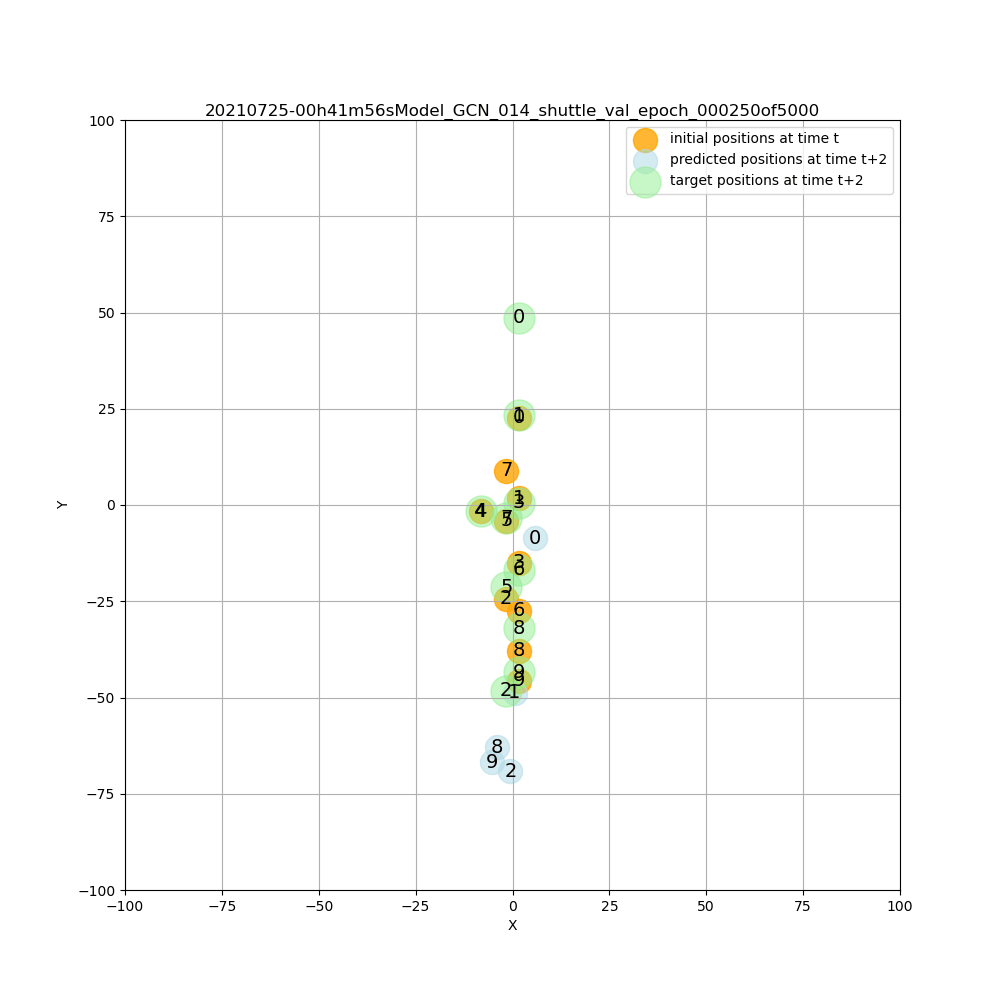

In [16]:
Image(open(f'{path_GIF}','rb').read())

In [17]:
path_GIF= build_gif(folder = f'/storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_{GCN_num}/{this_date}-{ts}/figures_training_set/',
              title = "Predictions over epochs",
              search = "", 
              fps=0.5,
              recursive = True,
              delete_tempFiles = False,
              max_n_images = 200
             )

1it [00:00,  8.58it/s]

found 20 images in folder : /storage/remote/atcremers50/ss21_multiagentcontrol/006_model_output/GCN_014/20210725-00h41m56s/figures_training_set/
the gif will be create using the first 20 images


20it [00:01, 10.03it/s]


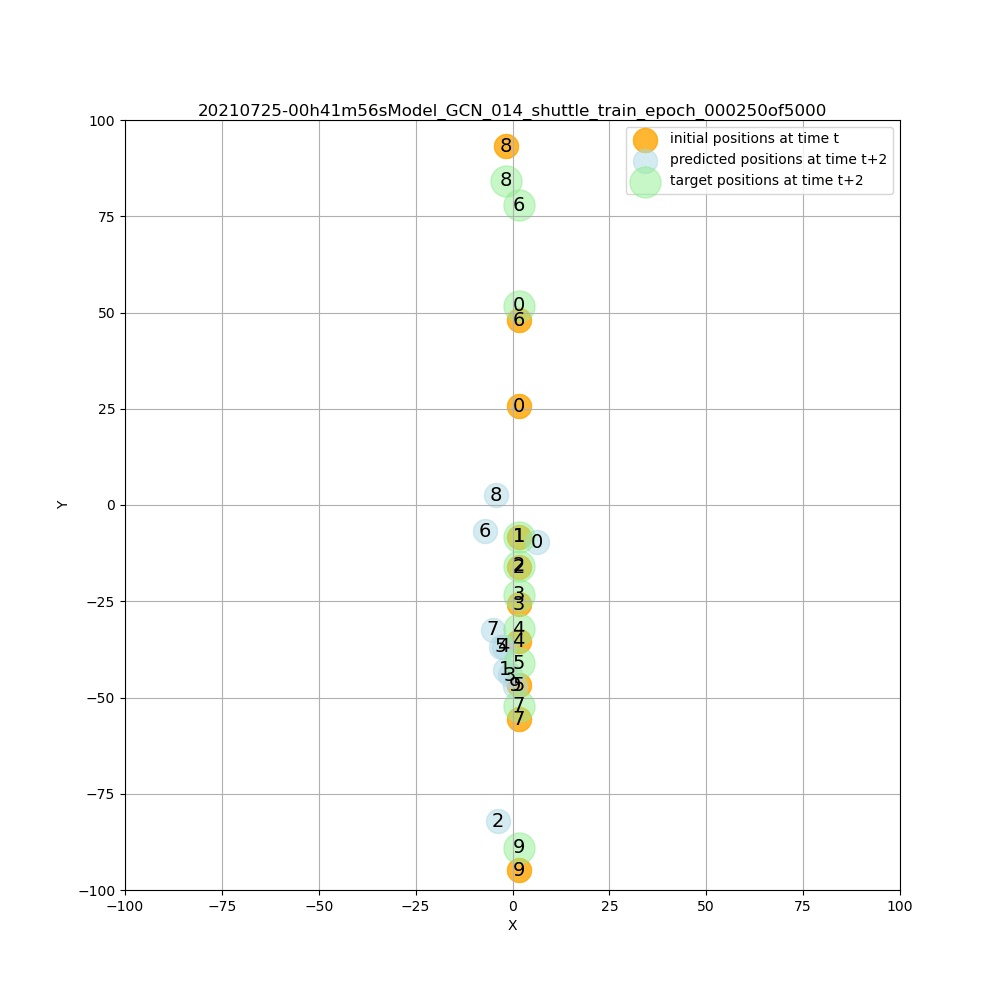

In [18]:
Image(open(f'{path_GIF}','rb').read())

In [19]:
deleted_folders = delete_empty_r(directory= MODEL_OUTPUT_PATH,printstat = True)